In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from feature_engine.encoding import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [92]:
df = pd.read_csv("dataset/Engineering_graduate_salary.csv")
df.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


Dropping unnecessary columns

In [93]:
df.drop(['ID','DOB','CollegeID','12graduation','10board','12board','CollegeState','CollegeCityID','CollegeCityTier','GraduationYear'],axis = 1,inplace   = True)
df.head()

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,87.80,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,650,665,810,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,57.00,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,440,435,210,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,77.33,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,485,475,505,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,84.30,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,675,620,635,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,82.00,75.00,2,B.Tech/B.E.,biotechnology,64.30,575,495,365,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [94]:
cat_cols = [var for var in df.columns if df[var].dtype == 'object']
cat_cols

['Gender', 'Degree', 'Specialization']

Check missing & duplicated values

In [95]:
# function to check missing & duplicated values
def check_data(df):
    print('-' *50)
    
    missing_data = df.isnull().sum().sum()
    
    print(f'There are {missing_data} missing values in the dataset.')
    print(f'There are {df.duplicated().sum().sum()} duplicated values in the dataset.')
    print('-' *50)
    
    if missing_data > 0:
        print('Missing values:')
        print(df.isnull().sum().sort_values(ascending=False))
        print('-' *50)

In [96]:
check_data(df)

--------------------------------------------------
There are 0 missing values in the dataset.
There are 0 duplicated values in the dataset.
--------------------------------------------------


If you see "-1" value in ['Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience','MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg'], that means the individual is not taking the test.

Add Rare label (Other) in Specializations column only (We're not gonna use `feature-engine` library in this case (karena simple))

In [97]:
df['Specialization'].value_counts()

Specialization
electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
electrical engineering                          63
electronics & instrumentation eng               24
instrumentation and control engineering         18
information science engineering                 18
electronics and instrumentation engineering     18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
other                                           10
industrial & production engineering              8
chemical engineering                             7
applied electron

In [98]:
rare_label_top = df['Specialization'].value_counts().head(10).index

def rare_label(var):
    if var in rare_label_top:
        return var
    return "Other"

df['Specialization'] = df['Specialization'].apply(rare_label)

Variable Encoding

In [99]:
le = OrdinalEncoder(
    encoding_method='arbitrary',
    variables = cat_cols

)

df = le.fit_transform(df)

df.head()

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,0,87.80,84.00,1,0,0,73.82,650,665,810,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,1,57.00,64.50,2,0,1,65.00,440,435,210,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,1,77.33,85.17,2,0,2,61.94,485,475,505,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,1,84.30,86.00,1,0,1,80.40,675,620,635,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,0,82.00,75.00,2,0,0,64.30,575,495,365,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


Apply feature scaling

In [100]:
X = df.drop('Salary',axis = 1)
y = df['Salary']

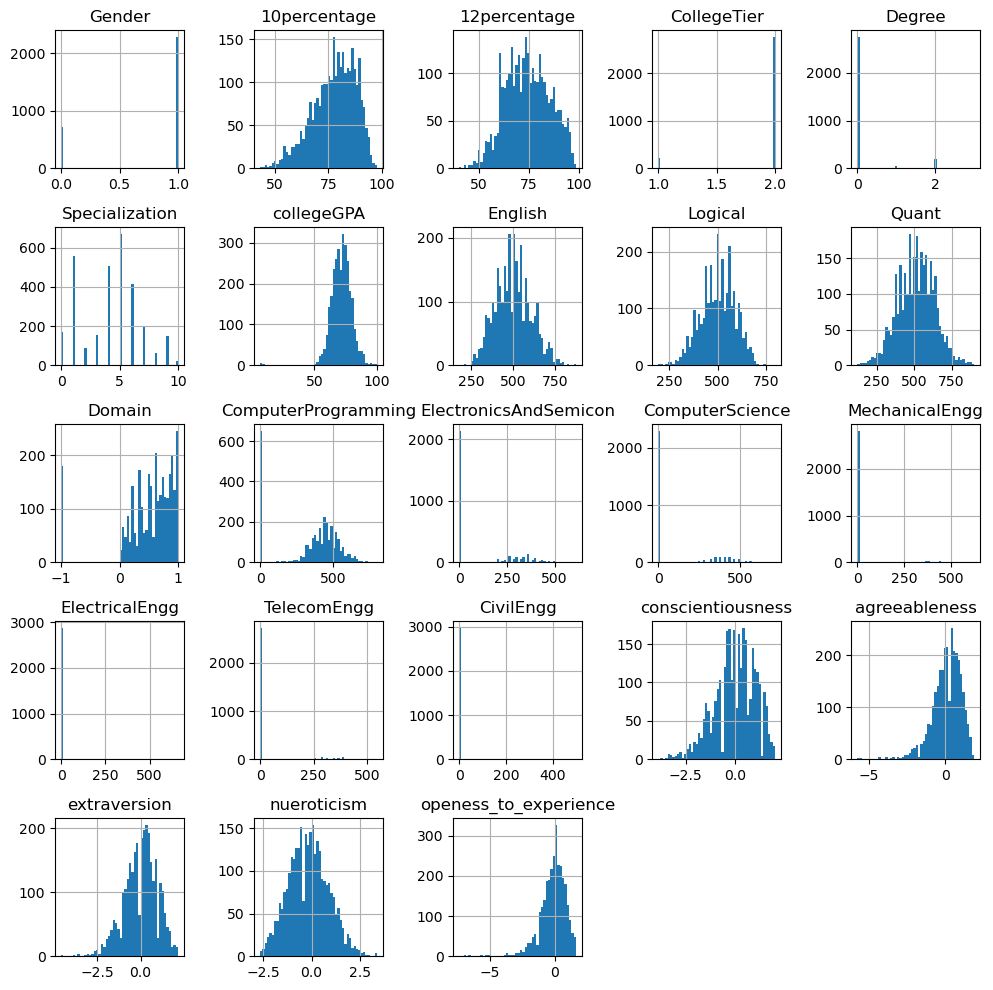

In [101]:
X.hist(bins=50, figsize=(10,10))
plt.tight_layout()
plt.show()

The variables is normally distributed, so we're using MinMaxScaler to scale the data.

In [102]:
mms = MinMaxScaler()
X = mms.fit_transform(X)

In [103]:
X_train,X_test,y_train,y_test = train_test_split(
    X,
    y,
    test_size= 0.2,
    random_state = 0
)

X_train.shape, X_test.shape

((2398, 23), (600, 23))

Training our model

In [104]:
model_gb = GradientBoostingRegressor(n_estimators=200, max_depth=7, random_state=0)
model_gb.fit(X_train,y_train)

model_rf = RandomForestRegressor(n_estimators=135, max_depth=10, random_state=0)
model_rf.fit(X_train,y_train)

model_xgb = XGBRegressor(random_state=0)
model_xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [105]:
models ={
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=200, max_depth=7, random_state=0),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=135, max_depth=10, random_state=0),
    'XGBoost':  XGBRegressor(random_state=0),
}

In [106]:
result_test = {}

for name, model in models.items():
    model.fit(X_test, y_test)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    result_test[name] = {
        'Mean Squared Error': mse,
        'Mean Absolute Error': mae,
        'R^2 Score': r2,
        'Root Mean Squared Error': rmse
}

In [107]:
comparison_df_test = pd.DataFrame(result_test).T
comparison_df_test.reset_index(inplace=True)
comparison_df_test.rename(columns={'index': 'Model'}, inplace=True)

In [108]:
comparison_df_test

,Model,Mean Squared Error,Mean Absolute Error,R^2 Score,Root Mean Squared Error
0,Gradient Boosting Regressor,9.065842e+05,687.390632,0.999974,952.147137
1,Random Forest Regressor,5.697529e+09,54731.269900,0.834545,75481.976345
2,XGBoost,1.052463e+06,669.781016,0.999969,1025.896050


### Predict

In [109]:
predictions_gb = model_gb.predict(X_test)
predictions_rf = model_rf.predict(X_test)
predictions_xgb = model_xgb.predict(X_test)

In [110]:
diff_gb = y_test - predictions_gb
diff_rf = y_test - predictions_rf
diff_xgb = y_test - predictions_xgb

### Visualizing difference

<Figure size 1200x600 with 0 Axes>

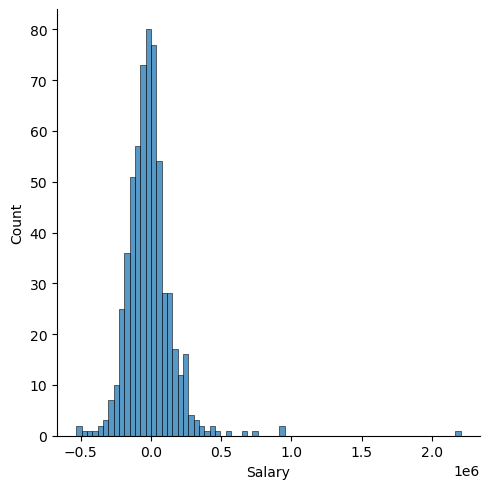

In [111]:
plt.figure(figsize = (12,6))
sns.displot(diff_gb)

<Figure size 1200x600 with 0 Axes>

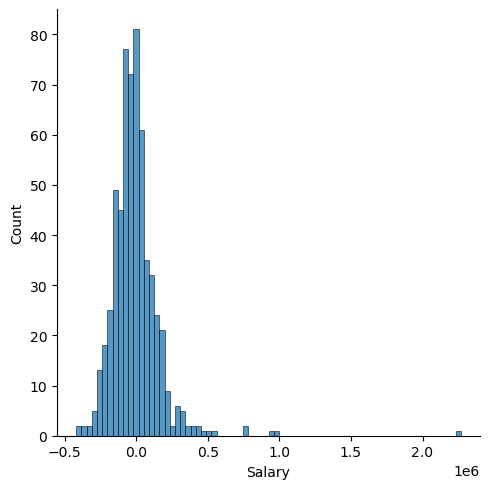

In [112]:
plt.figure(figsize = (12,6))
sns.displot(diff_rf)

<Figure size 1200x600 with 0 Axes>

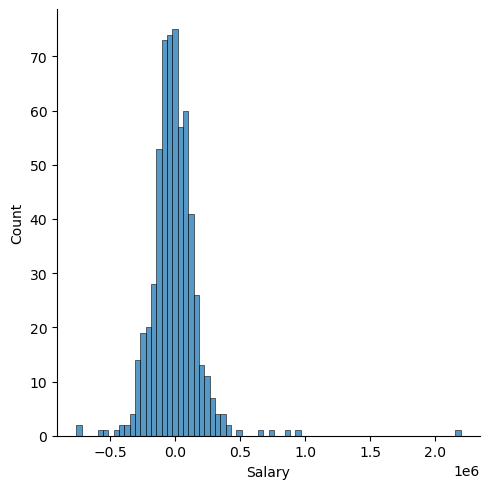

In [113]:
plt.figure(figsize = (12,6))
sns.displot(diff_xgb)

In [114]:
print(model_gb.score(X_test,y_test))
print(model_rf.score(X_test, y_test))
print(model_xgb.score(X_test, y_test))

0.07043068909038896
0.0802500118425481
-0.005655390081591882


Visualize the actual vs predicted salaries

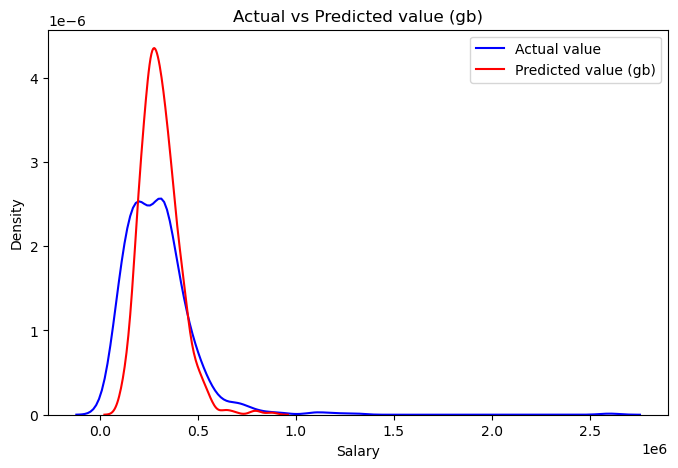

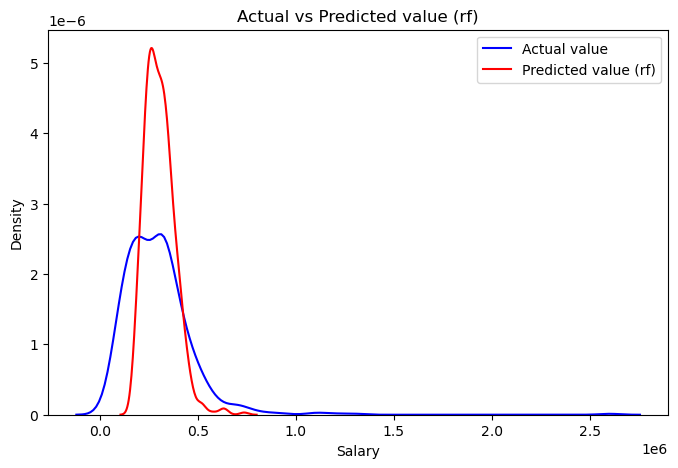

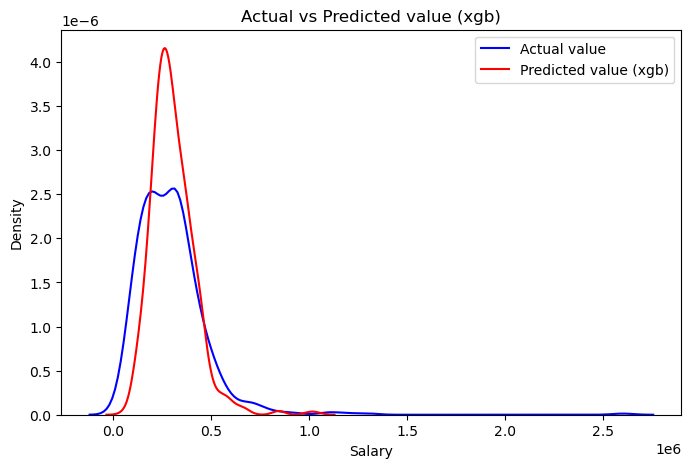

In [115]:
predictions = {
    'gb': predictions_gb,
    'rf': predictions_rf,
    'xgb': predictions_xgb,
}


for model_name, y_pred in predictions.items():
    plt.figure(figsize=(8, 5))
    
    sns.kdeplot(y_test, label='Actual value', color='blue')
    sns.kdeplot(y_pred, label=f'Predicted value ({model_name})', color='red')

    plt.title(f"Actual vs Predicted value ({model_name})")
    plt.legend()
    plt.show()

Gradient Boosting Regressor is the best model for this dataset.

In [116]:
len(y_test), len(predictions_gb)

(600, 600)

In [117]:
actual = pd.DataFrame(np.array(y_test), columns=['Actual'])
predicted_xgb = pd.DataFrame(np.array(predictions_xgb).astype(int), columns=['Predicted Salary (XGBoost Regressor)'])

# concatenate the actual and predicted values
results = pd.concat([actual, predicted], axis=1)
results

,Actual,Predicted
0,215000,576340
1,220000,431241
2,260000,283614
3,285000,59987
4,600000,493046
...,...,...
595,300000,169099
596,270000,364769
597,380000,306260
598,385000,196918


In [118]:
predicted_gb = pd.DataFrame(np.array(predictions_gb).astype(int), columns=['Predicted Salary (Gradient Boosting)'])

results = pd.concat([results, predicted_gb], axis=1)
results

,Actual,Predicted,Predicted Salary (Gradient Boosting)
0,215000,576340,287510
1,220000,431241,260481
2,260000,283614,262947
3,285000,59987,140235
4,600000,493046,418467
...,...,...,...
595,300000,169099,236188
596,270000,364769,317442
597,380000,306260,329897
598,385000,196918,245035


Saving our model for deployment (XGBoost Regressor)

In [120]:
import pickle as pkl

with open('.pkl/encoder.pkl', 'wb') as f:
    pkl.dump(le, f)

with open('.pkl/scaler.pkl', 'wb') as f:
    pkl.dump(mms, f)

# Saving the model
with open('.pkl/regressor.pkl', 'wb') as f:
    pkl.dump(model_gb, f)

In [121]:
le.encoder_dict_

{'Gender': {'f': 0, 'm': 1},
 'Degree': {'B.Tech/B.E.': 0, 'M.Tech./M.E.': 1, 'MCA': 2, 'M.Sc. (Tech.)': 3},
 'Specialization': {'Other': 0,
  'computer science & engineering': 1,
  'electronics & telecommunications': 2,
  'mechanical engineering': 3,
  'information technology': 4,
  'electronics and communication engineering': 5,
  'computer engineering': 6,
  'computer application': 7,
  'electrical engineering': 8,
  'electronics and electrical engineering': 9,
  'electronics & instrumentation eng': 10}}

In [122]:
df.columns

Index(['Gender', '10percentage', '12percentage', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'Salary'],
      dtype='object')

In [130]:
df

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,0,87.80,84.00,1,0,0,73.82,650,665,810,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,1,57.00,64.50,2,0,1,65.00,440,435,210,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,1,77.33,85.17,2,0,2,61.94,485,475,505,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,1,84.30,86.00,1,0,1,80.40,675,620,635,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,0,82.00,75.00,2,0,0,64.30,575,495,365,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,0,75.00,73.00,2,0,5,70.00,505,485,445,...,-1,-1,-1,-1,-1.1901,0.9688,-1.0697,1.35490,0.0284,120000
2994,0,84.00,77.00,2,0,4,75.20,345,585,395,...,-1,-1,-1,-1,-0.1082,0.0328,-0.4891,-0.29020,0.5024,120000
2995,1,91.40,65.56,2,0,4,73.19,385,425,485,...,-1,-1,-1,-1,-0.8810,0.1888,-0.3440,0.06230,0.6603,385000
2996,1,88.64,65.16,2,0,6,74.81,465,645,505,...,-1,-1,-1,-1,1.4374,1.2808,-0.4891,-1.46537,0.5419,530000
